# Self Driving Car - Lane Detection
### The code is meant to walk the beginner through the process of seeing how each step effects the images

#### Follow the generalized steps below
1. Start with an Image
2. Reduce Color
3. Average Color
4. Detect Edges
5. Region of Interest
6. Hough Lines
7. Average Lines
8. Draw Lines
9. Apply Process Frame by Frame to Video

### Imports

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
%matplotlib inline

## 1. Display Images in Local Directory

/Users/mark/Desktop/LaneDetectionProject1
This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


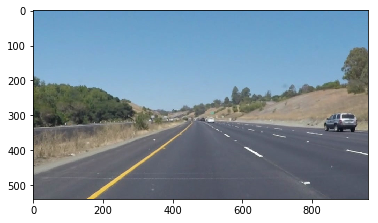

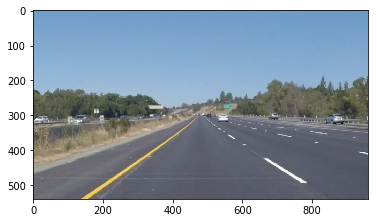

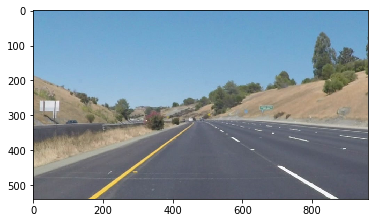

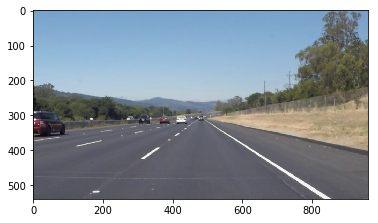

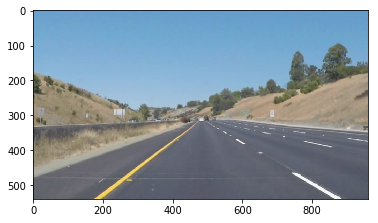

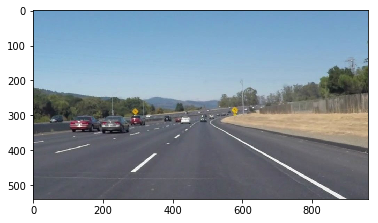

In [2]:
list_images = os.listdir("test_images/")

print(os.getcwd())

for image in list_images:
    if image[0] != ".": #Not sure how to exclude system files
        #reading in an image
        file_str = 'test_images/' + image
        image_np = mpimg.imread(file_str)
        #printing out some stats and plotting
        print('This image is:', type(image_np), 'with dimensions:', image_np.shape)
        plt.figure()
        plt.imshow(image_np)
        

In [3]:
import math

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

## 2. Reduce Color (Display Images in Gray Scale)

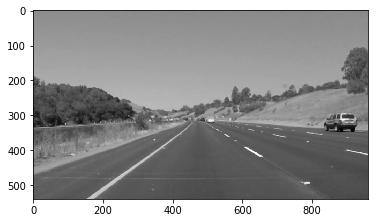

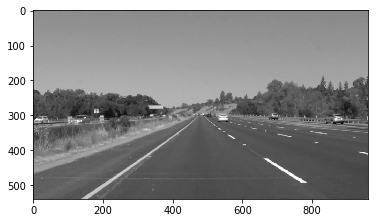

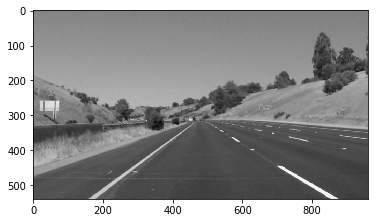

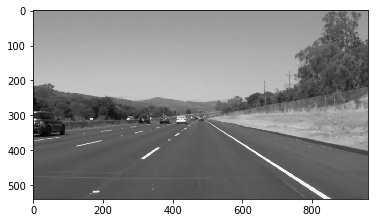

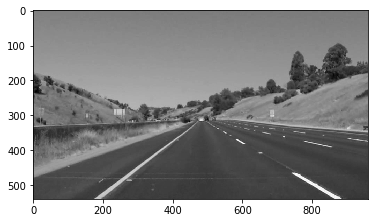

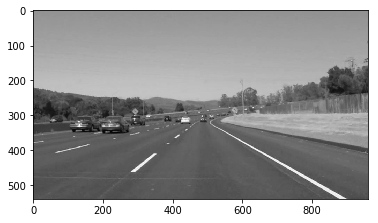

In [4]:


for image in list_images:
    if image[0] != ".": #Not sure how to exclude system files
        #reading in an image
        file_str = 'test_images/' + image
        image_np = mpimg.imread(file_str)
        gray = grayscale(image_np)
        plt.figure()
        plt.imshow(gray, cmap = 'gray')
        

In [5]:
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

## 3. Average Color (Apply Gaussian Blur)

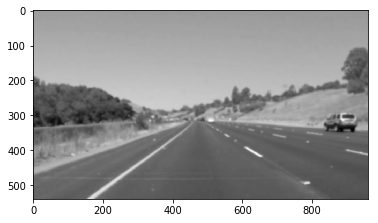

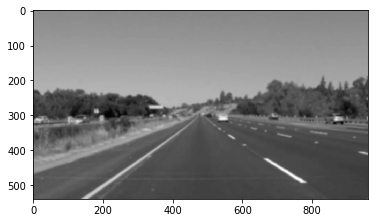

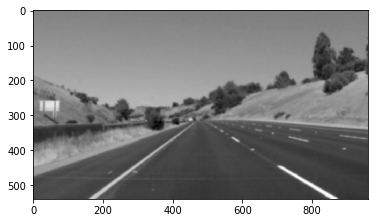

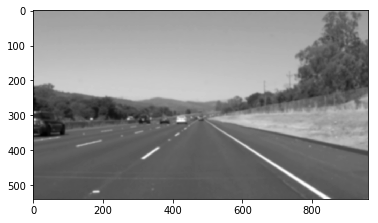

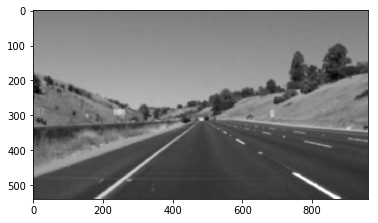

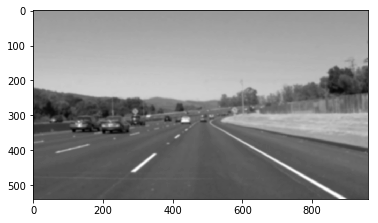

In [6]:
for image in list_images:
    if image[0] != ".":
        #reading in an image
        file_str = 'test_images/' + image
        image_np = mpimg.imread(file_str)
        gray = grayscale(image_np)
        gray_average = gaussian_blur(gray,11) # Must be an odd number
        plt.figure()
        plt.imshow(gray_average, cmap = 'gray')


In [7]:
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

## 4. Detect Edges (Apply Canny)

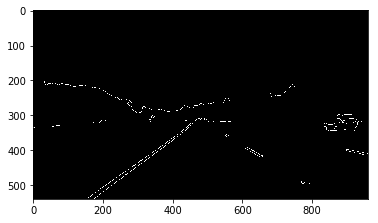

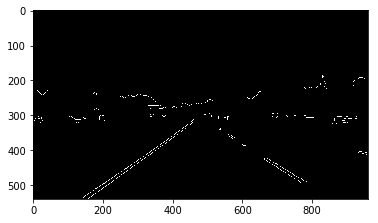

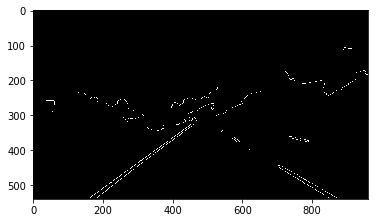

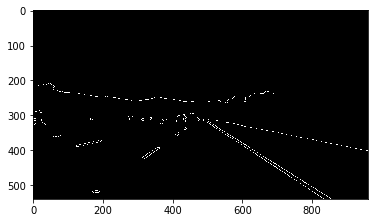

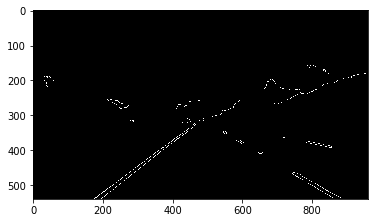

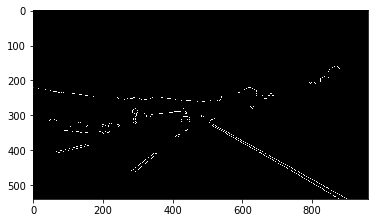

In [8]:
for image in list_images:
    if image[0] != ".": #Not sure how to exclude system files
        #reading in an image
        file_str = 'test_images/' + image
        image_np = mpimg.imread(file_str)
        gray = grayscale(image_np)
        gray_average = gaussian_blur(gray,11) # Must be an odd number
        edges = canny(gray_average, 50, 150)
        plt.figure()
        plt.imshow(edges, cmap = 'gray')


### Region of Interest

In [9]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    Keeps region defined by the polygon formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

## 5. Region of Interest Applied

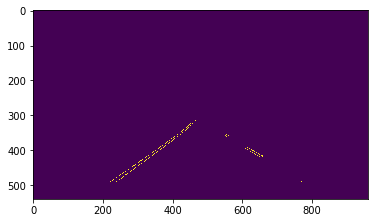

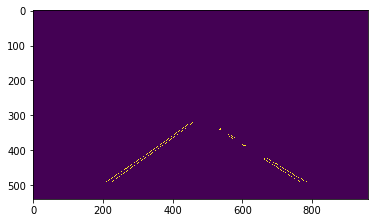

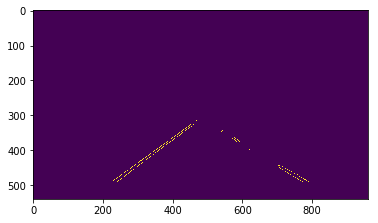

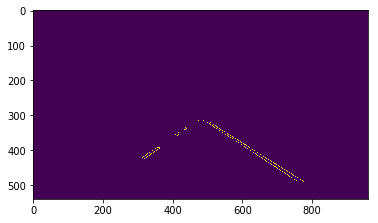

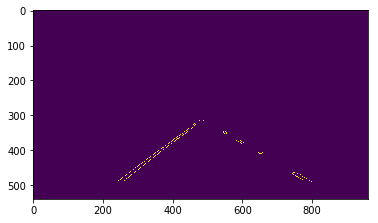

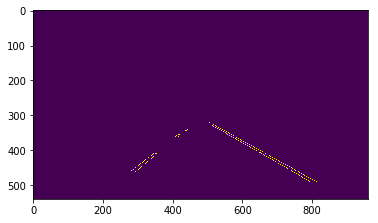

In [10]:
imshape = image_np.shape

for image in list_images:
    if image[0] != ".": #Not sure how to exclude system files
        #reading in an image
        file_str = 'test_images/' + image
        image_np = mpimg.imread(file_str)
        gray = grayscale(image_np)
        gray_average = gaussian_blur(gray,11) # Must be an odd number
        edges = canny(gray_average, 50, 150)

        # [1] is x axis and [0] is y axis. y goes positive downward
        # The added numbers are to raise the ROI passed the hood of car view.
        vertices = np.array([[(.51*imshape[1], imshape[0]*.58), 
                              (.49*imshape[1], imshape[0]*.58), 
                              (0+70, imshape[0]-50), 
                              (imshape[1]-70, imshape[0]-50)]], 
                            dtype=np.int32)

        target = region_of_interest(edges, vertices)
        plt.figure()
        plt.imshow(target)

### Notice the lines are much cleaner and easier to manipulate after we restrict the region. 

## 7. Average Lines
## 8. Draw Lines

In [11]:
def draw_lines(img, lines, color=[0, 255, 0], thickness=2):
    """
    """

    l_slope_sum = 0
    r_slope_sum = 0
    l_num = 0
    r_num = 0
    l_x_sum = 0
    l_y_sum = 0    
    r_x_sum = 0
    r_y_sum = 0    
  
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope=((y1-y2)/(x1-x2))
            if (slope < -0.6 and slope > -0.9):
                l_slope_sum += slope
                l_num = l_num + 1
                l_x_sum = l_x_sum + x1 + x2
                l_y_sum = l_y_sum + y1 + y2
            elif (slope > 0.45 and slope < 0.75):
                r_slope_sum += slope
                r_num = r_num + 1
                r_x_sum = r_x_sum + x1 + x2
                r_y_sum = r_y_sum + y1 + y2

    if l_num != 0 :
        l_slope = l_slope_sum / l_num
        l_x_avg = int(l_x_sum / (2*l_num) )
        l_y_avg = int(l_y_sum / (2*l_num) )  
        l_y1 = 310
        l_x1 = int( (l_y1 - l_y_avg)/l_slope + l_x_avg )
        l_y2 = int(imshape[0])
        l_x2 = int( (l_y2 - l_y_avg)/l_slope + l_x_avg )
        cv2.line(img, (l_x1, l_y1), (l_x2, l_y2), color=(255,0,0), thickness=3)
        
    if r_num != 0 :
        r_slope = r_slope_sum / r_num
        r_x_avg = int(r_x_sum / (2*r_num) )
        r_y_avg = int(r_y_sum / (2*r_num) ) 
        r_y1 = 310
        r_x1 = int( (r_y1 - r_y_avg)/r_slope + r_x_avg )
        r_y2 = int(imshape[0])
        r_x2 = int( (r_y2 - r_y_avg)/r_slope + r_x_avg )
        cv2.line(img, (r_x1, r_y1), (r_x2, r_y2), color=(255,0,0), thickness=3) 


In [12]:
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    img is the output of a Canny.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    
    return line_img

## 6. Hough Lines (Draw Lines)

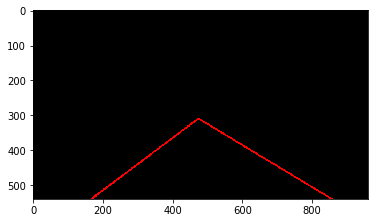

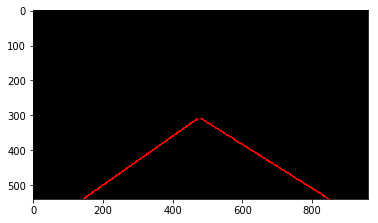

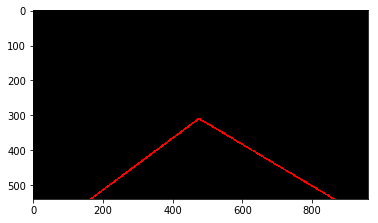

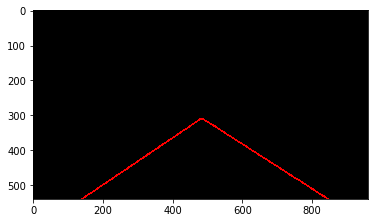

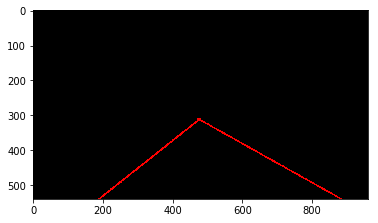

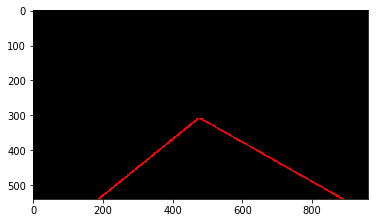

In [13]:
imshape = image_np.shape

for image in list_images:
    if image[0] != ".":
        #reading in an image
        file_str = 'test_images/' + image
        image_np = mpimg.imread(file_str)
        gray = grayscale(image_np)
        gray_average = gaussian_blur(gray,11) # Must be an odd number
        edges = canny(gray_average, 50, 150)

        # [1] is x axis and [0] is y axis. y goes positive downward
        # The added numbers are to raise the ROI passed the hood of car view.
        vertices = np.array([[(.51*imshape[1], imshape[0]*.58), 
                              (.49*imshape[1], imshape[0]*.58), 
                              (0+70, imshape[0]-50), 
                              (imshape[1]-70, imshape[0]-50)]], 
                            dtype=np.int32)
        target = region_of_interest(edges, vertices)
        lines = hough_lines(target, 1, np.pi/180, 35, 5, 2)
        plt.figure()
        plt.imshow(lines)

In [14]:
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

In [15]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# iterate through each file in test_images directory
# for files in list_images:
#    image = mpimg.imread('test_images/' + files)

def prepare_image(image):
    """Clean and prep image for lane detection"""

    gray = grayscale(image)
    gray = gaussian_blur(gray,3)
    
    edges = canny(gray, 50, 150)
    imshape = image.shape

    # [1] is x axis and [0] is y axis. y goes positive downward
    vertices = np.array([[(.51*imshape[1], imshape[0]*.58), 
                          (.49*imshape[1], imshape[0]*.58), 
                          (0+70, imshape[0]-75), 
                          (imshape[1]-70, imshape[0]-75)]], 
                        dtype=np.int32)

    target = region_of_interest(edges, vertices)

    # Hough Transform
    rho = 1
    theta = 1 * np.pi/180
    threshold = 10
    min_line_length = 5
    max_line_gap = 2
    
    lines = hough_lines(target, 1, theta, threshold, min_line_length, max_line_gap)
    
    result = weighted_img(lines, image,α=0.9, β=1., λ=0.)
        
    return result

In [16]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [17]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    result = prepare_image(image)
    # you should return the final output (image where lines are drawn on lanes)

    return result

In [18]:
white_output = 'test_videos_output/solidWhiteRight_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight_output.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight_output.mp4


100%|█████████▉| 221/222 [00:02<00:00, 96.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight_output.mp4 

CPU times: user 1.81 s, sys: 328 ms, total: 2.14 s
Wall time: 2.63 s


In [19]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [20]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)


clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:07<00:00, 94.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 5.75 s, sys: 867 ms, total: 6.61 s
Wall time: 7.55 s


In [21]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

In [22]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)


clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4


100%|██████████| 251/251 [00:05<00:00, 47.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

CPU times: user 4.34 s, sys: 632 ms, total: 4.97 s
Wall time: 6.02 s


In [23]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))